In [120]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [121]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [122]:
X_test.shape

(10000, 32, 32, 3)

In [123]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

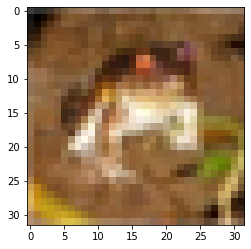

In [124]:
plt.imshow(X_train[0])

In [126]:
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [127]:
Y_train = Y_train.reshape(-1,)
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [128]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [129]:
classes[3]

'cat'

In [130]:
def plot_sample(X, Y, index) :
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])


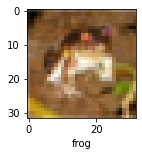

In [131]:
plot_sample(X_train, Y_train, 0)

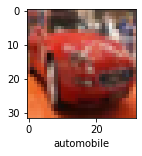

In [132]:
plot_sample(X_train, Y_train, 5)

In [143]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten



CNN MODEL


In [144]:



#create model
model = Sequential()
#add model layers
# CNN
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

# Dense
model.add(Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [134]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [135]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 32)        18464     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                73792     
_________________________________________________________________
dense_20 (Dense)             (None, 10)               

In [136]:


model.fit(X_train, Y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 71s 45ms/step - loss: 2.2485 - accuracy: 0.2599
Epoch 2/15
1563/1563 [==============================] - 69s 44ms/step - loss: 1.5059 - accuracy: 0.4590
Epoch 3/15
1563/1563 [==============================] - 69s 44ms/step - loss: 1.2858 - accuracy: 0.5498
Epoch 4/15
1563/1563 [==============================] - 69s 44ms/step - loss: 1.1480 - accuracy: 0.6015
Epoch 5/15
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0552 - accuracy: 0.6348
Epoch 6/15
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9744 - accuracy: 0.6642
Epoch 7/15
1563/1563 [==============================] - 70s 44ms/step - loss: 0.9117 - accuracy: 0.6865
Epoch 8/15
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8547 - accuracy: 0.7043
Epoch 9/15
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8034 - accuracy: 0.7196
Epoch 10/15
1563/1563 [==============================] - 73s 47m

In [138]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.2691 - accuracy: 0.6404


[1.2690892219543457, 0.6403999924659729]

In [139]:
Y_pred = model.predict(X_test)
Y_pred[:5]

array([[2.8185553e-03, 1.2750681e-03, 1.3295268e-02, 3.7513152e-01,
        1.3885659e-02, 7.3517300e-02, 4.0556109e-01, 1.0615132e-02,
        9.6468985e-02, 7.4314852e-03],
       [1.0057493e-03, 2.4777214e-01, 4.3181697e-07, 6.5010681e-07,
        3.3529731e-11, 4.5505754e-08, 9.5331176e-10, 4.7100002e-10,
        7.5085837e-01, 3.6264095e-04],
       [1.1949770e-01, 3.3064619e-01, 2.8393697e-03, 1.4456072e-03,
        7.2477604e-05, 3.9954099e-04, 1.0289142e-05, 2.4759167e-04,
        3.5745275e-01, 1.8738849e-01],
       [9.2896986e-01, 6.4974749e-03, 1.4402588e-02, 4.9017365e-03,
        4.3504946e-03, 2.2386004e-04, 6.0671631e-05, 5.4791715e-04,
        3.6608752e-02, 3.4366706e-03],
       [9.4355947e-08, 3.0256626e-07, 2.6398545e-04, 5.2620303e-03,
        9.8587555e-01, 4.6036369e-04, 8.1308326e-03, 4.5051411e-06,
        3.5628656e-07, 1.8615954e-06]], dtype=float32)

In [140]:
Y_classes = [np.argmax(element) for element in Y_pred]
Y_classes[:5]

[6, 8, 8, 0, 4]

In [141]:
classes[Y_classes[3]]

'airplane'